<a href="https://colab.research.google.com/github/haroldpc258/COVID-19-Mortality-Predictor-using-Biomarkers-and-Machine-Learning/blob/master/Proyecto_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto, Modelos Computacionales**

Elaborado por:


*   Harold Peña Cuellar
*   Andrés castaño Calderón

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#metodologías
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Evaluación de metodologías
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
import seaborn as sn; sn.set()
import pylab as pl
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#Regresión
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_dataset='/content/drive/MyDrive/Proyecto Modelos/dataset.csv'
database = pd.read_csv(Path_dataset)
database.head(10)

,age,gender,race,death,Time_from_COVID_positive_to_death_in_days,ventilator,albumin,diastolicBP,systolicBP,cr,...,bmi,glucose,direct_bili,total_bili,indirect_bili,creatine_kinase,pro_bnp,potassium,charlson_score,ct_value
0,89+,F,Black,1,0.877083,0,3.9,70,128,2.43,...,25.64,184.0,0.1999,0.3,0.1001,923.0,NaN,NaN,5,NaN
1,89+,F,Black,1,9.761806,0,3.5,97,124,1.99,...,25.52,230.0,0.4000,1.0,0.6000,121.0,572.0,5.4,6,34.0
2,89+,F,Other,0,NaN,0,3.8,61,126,2.60,...,15.14,102.0,0.1999,0.5,0.3001,532.0,1363.0,4.7,0,NaN
3,89+,F,Black,0,NaN,0,3.6,56,113,1.40,...,19.19,206.0,0.2000,0.4,0.2000,100.0,1982.0,4.4,5,NaN
4,89+,M,Other,0,NaN,0,3.7,62,114,1.79,...,18.78,237.0,0.1999,0.2,0.0001,NaN,NaN,5.4,5,NaN
5,89+,M,Black,0,NaN,0,3.7,63,108,2.56,...,NaN,246.0,0.1999,0.4,0.2001,226.0,NaN,5.0,4,NaN
6,89+,F,Other,1,4.333333,0,3.4,0,0,1.20,...,25.68,NaN,0.1999,0.3,0.1001,NaN,3945.0,3.6,4,NaN
7,89+,F,Black,1,0.573611,0,3.6,68,162,2.74,...,27.82,415.0,0.1999,0.3,0.1001,1623.0,NaN,4.7,1,NaN
8,89+,F,Black,0,NaN,0,4.0,78,127,4.90,...,26.47,173.0,0.4000,0.9,0.5000,NaN,NaN,4.7,3,38.2
9,89+,F,Declined,0,NaN,0,NaN,75,145,0.70,...,15.74,NaN,NaN,NaN,0.0000,NaN,NaN,4.4,2,NaN


In [ ]:
database.describe()

,death,Time_from_COVID_positive_to_death_in_days,ventilator,albumin,diastolicBP,systolicBP,cr,ddimer,egfr,eosinophil,...,bmi,glucose,direct_bili,total_bili,indirect_bili,creatine_kinase,pro_bnp,potassium,charlson_score,ct_value
count,4313.000000,1087.000000,4313.000000,4009.000000,4313.000000,4313.000000,4134.000000,2746.000000,4133.000000,4265.000000,...,4070.000000,3711.000000,4093.000000,4093.000000,4313.000000,3342.000000,2267.000000,4158.000000,4313.000000,1088.000000
mean,0.252029,8.375917,0.271505,3.723771,67.621609,120.303501,2.036616,3.971679,63.297456,0.037397,...,30.403747,187.763678,0.295926,0.600977,0.289491,642.111007,2407.780237,4.424772,2.299328,27.683364
std,0.434228,6.908868,0.594320,0.542227,16.609607,24.686183,2.587585,5.518993,35.680540,0.095618,...,48.362443,133.381473,0.558640,0.943887,0.446375,3106.992429,4332.333529,0.738499,2.337212,6.168892
min,0.000000,0.037500,0.000000,1.999900,0.000000,0.000000,0.199990,0.220000,2.000000,0.000000,...,9.900000,18.000000,0.199900,0.000000,-0.199900,19.999000,59.999000,1.999900,0.000000,12.800000
25%,0.000000,3.147569,0.000000,3.400000,59.000000,108.000000,0.810000,0.860000,33.000000,0.000000,...,24.632500,114.000000,0.199900,0.300000,0.100100,85.250000,104.000000,4.000000,0.000000,23.075000
50%,0.000000,6.154861,0.000000,3.800000,69.000000,122.000000,1.120000,1.710000,64.000000,0.000000,...,28.485000,140.000000,0.200000,0.500000,0.200100,169.000000,441.000000,4.300000,2.000000,27.300000
75%,1.000000,12.276042,0.000000,4.100000,79.000000,136.000000,1.920000,3.680000,92.000000,0.000000,...,33.197500,207.000000,0.300000,0.700000,0.400000,416.000000,1886.000000,4.800000,4.000000,32.900000
max,1.000000,29.967361,4.000000,5.700000,120.000000,215.000000,31.660000,20.000010,120.001000,1.500000,...,3069.260000,1000.001000,20.000100,38.500000,18.499900,80000.001000,15000.001000,9.000100,15.000000,41.500000


Edad

In [ ]:
database['age'].unique()

array(['89+', '88', '87', '86', '85', '84', '83', '82', '81', '80', '79',
       '78', '77', '76', '75', '74', '73', '72', '71', '70', '69', '68',
       '67', '66', '65', '64', '63', '62', '61', '60', '59', '58', '57',
       '56', '55', '54', '53', '52', '51', '50', '49', '48', '47', '46',
       '45', '44', '43', '42', '41', '40', '39', '38', '37', '36', '35',
       '34', '33', '32', '31', '30', '29', '28', '27', '26', '25', '24',
       '23', '22', '21', '20', '19', '18'], dtype=object)

In [ ]:
database['age'].value_counts()

89+    202
77     123
71     113
65     113
60     110
      ... 
20      11
23      10
21      10
19       9
18       3
Name: age, Length: 72, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


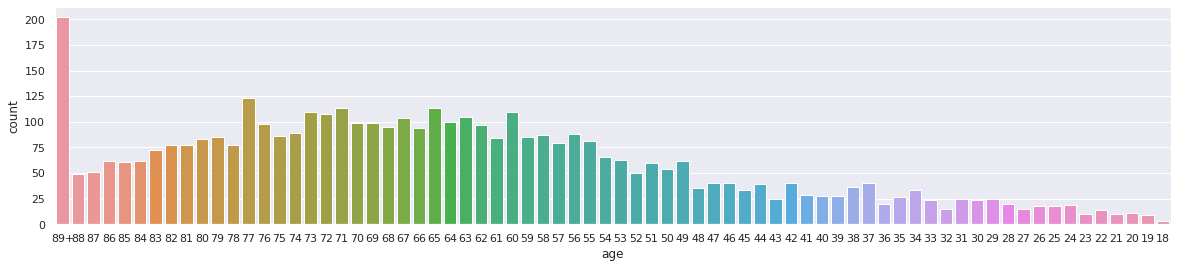

In [ ]:
plt.figure(figsize=(20, 4))
sn.countplot(database['age'], label='Count')
plt.show()

Raza

In [ ]:
database['race'].unique()

array(['Black', 'Other', 'Declined', 'White', 'Asian',
       'Native_American_Alaskan', 'Other_Pacific_Islander'], dtype=object)

In [ ]:
database['race'].value_counts()

Other                      1785
Black                      1560
White                       428
Declined                    418
Asian                       113
Native_American_Alaskan       5
Other_Pacific_Islander        4
Name: race, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


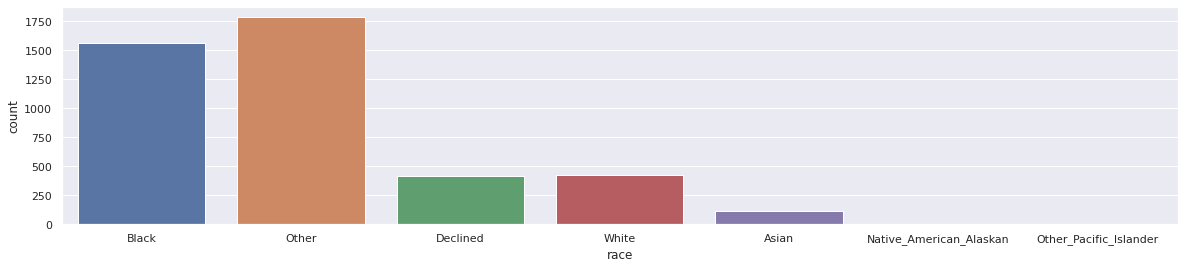

In [ ]:
plt.figure(figsize=(20, 4))
sn.countplot(database['race'], label='Count')
plt.show()

Género

In [ ]:
database['gender'].unique()

array(['F', 'M'], dtype=object)

In [ ]:
database['gender'].value_counts()

M    2289
F    2024
Name: gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


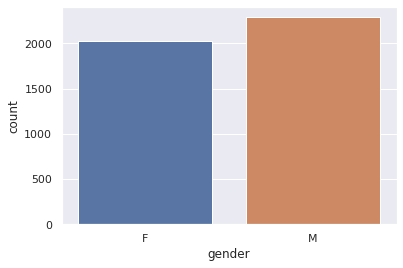

In [ ]:
sn.countplot(database['gender'], label='Count')
plt.show()

Tipo de Ventilador

In [ ]:
database['ventilator'].unique()

array([0, 2, 1, 4])

In [ ]:
database['ventilator'].value_counts()

0    3468
1     525
2     317
4       3
Name: ventilator, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


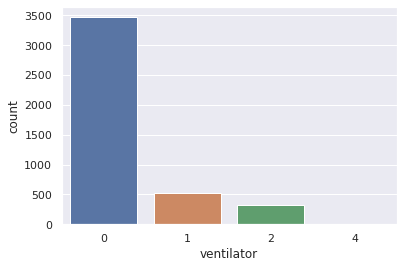

In [ ]:
sn.countplot(database['ventilator'], label='Count')
plt.show()

Muerte

In [ ]:
database['death'].unique()

array([1, 0])

In [ ]:
database['death'].value_counts()

0    3226
1    1087
Name: death, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


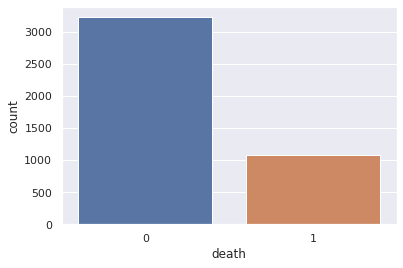

In [ ]:
sn.countplot(database['death'], label='Count')
plt.show()

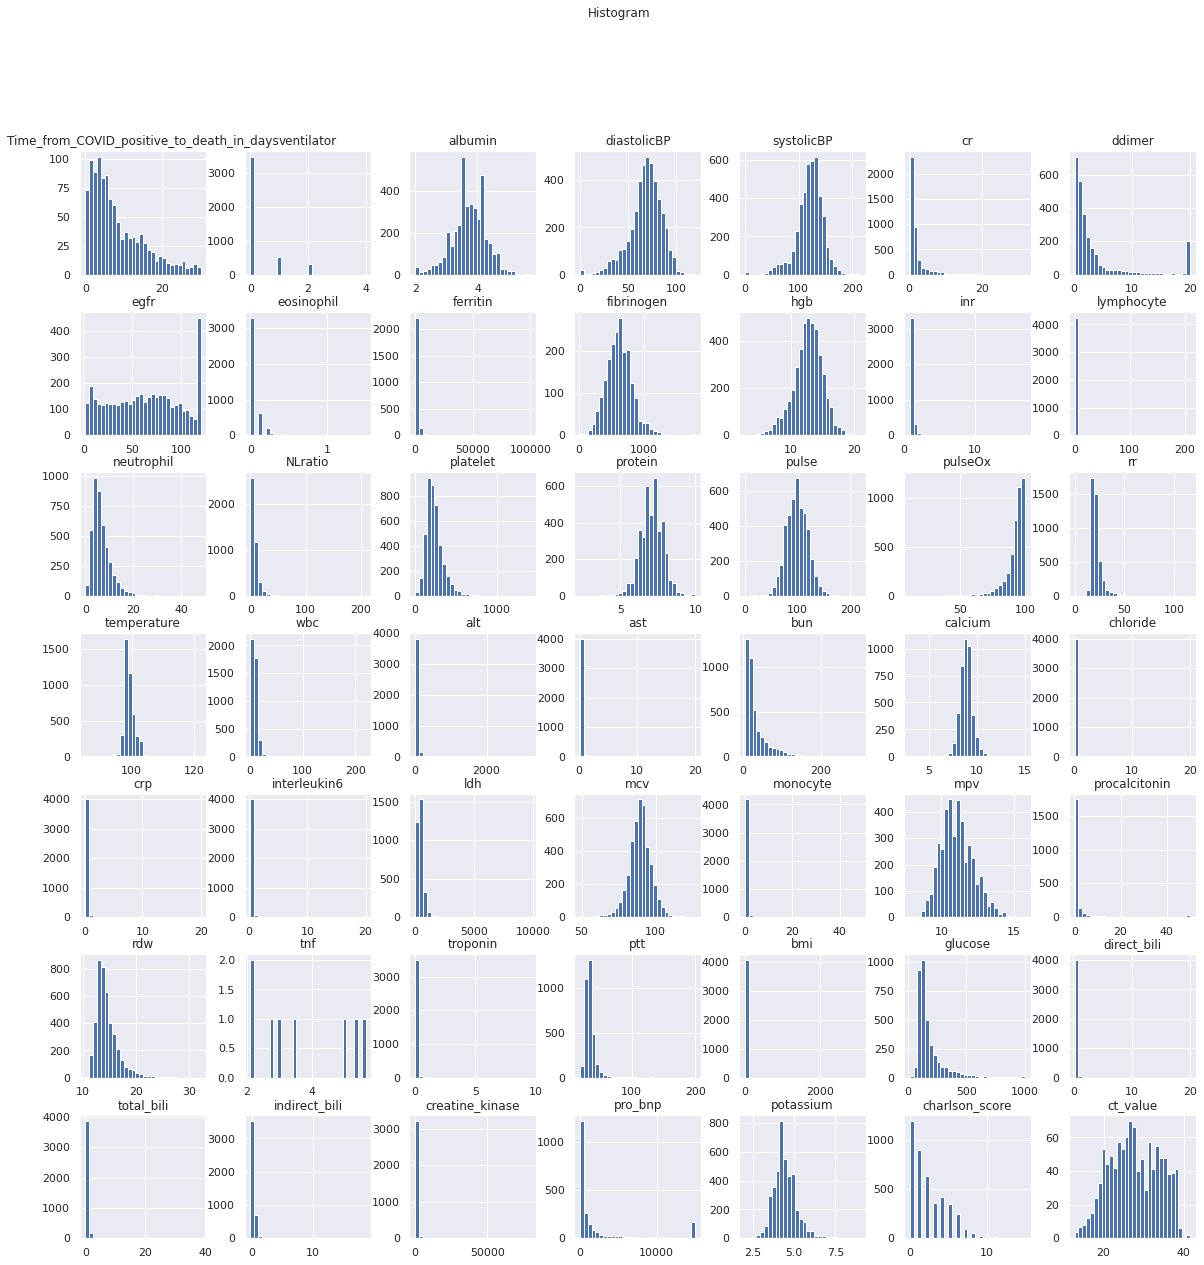

In [ ]:
database.drop('death', axis=1).hist(bins=30, figsize=(20, 20))
pl.suptitle('Histogram')
plt.show()

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        4313 non-null   object 
 1   gender                                     4313 non-null   object 
 2   race                                       4313 non-null   object 
 3   death                                      4313 non-null   int64  
 4   Time_from_COVID_positive_to_death_in_days  1087 non-null   float64
 5   ventilator                                 4313 non-null   int64  
 6   albumin                                    4009 non-null   float64
 7   diastolicBP                                4313 non-null   int64  
 8   systolicBP                                 4313 non-null   int64  
 9   cr                                         4134 non-null   float64
 10  ddimer                  

# **Preprocesamiento**

In [ ]:
df = database.copy()
df.drop(['Time_from_COVID_positive_to_death_in_days', 'ddimer', 'ferritin',
         'fibrinogen', 'ldh', 'inr', 'procalcitonin', 'tnf', 'troponin',
         'ptt', 'creatine_kinase', 'pro_bnp', 'ct_value'], axis=1, inplace=True) #Eliminamos las características con menos del 85% de datos no nulos.
df.head(10)

,age,gender,race,death,ventilator,albumin,diastolicBP,systolicBP,cr,egfr,eosinophil,hgb,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,mcv,monocyte,mpv,rdw,bmi,glucose,direct_bili,total_bili,indirect_bili,potassium,charlson_score
0,89+,F,Black,1,0,3.9,70,128,2.43,22.0,0.0,12.6,4.3,6.8,1.581395,149.0,7.4,106.0,83.0,32.0,98.3,11.7,18.000,0.1999,73.0,8.2,0.1999,0.1999,0.1999,101.0,0.6,11.6,14.6,25.64,184.0,0.1999,0.3,0.1001,NaN,5
1,89+,F,Black,1,0,3.5,97,124,1.99,28.0,0.1,8.1,2.2,7.5,3.409091,391.0,6.9,83.0,96.0,18.0,97.6,11.0,12.000,0.4000,32.0,9.1,0.4000,0.4000,0.4000,99.3,0.9,9.9,14.3,25.52,230.0,0.4000,1.0,0.6000,5.4,6
2,89+,F,Other,0,0,3.8,61,126,2.60,21.0,0.0,13.0,0.8,7.9,9.875000,84.0,8.1,96.0,100.0,26.0,99.6,9.2,25.000,0.1999,99.0,9.1,0.1999,0.1999,0.1999,98.6,0.5,14.7,13.9,15.14,102.0,0.1999,0.5,0.3001,4.7,0
3,89+,F,Black,0,0,3.6,56,113,1.40,42.0,0.0,13.8,1.7,10.1,5.941176,181.0,7.4,78.0,96.0,20.0,97.5,13.2,9.999,0.2000,65.0,10.7,0.2000,0.2000,0.2000,103.1,1.0,12.6,13.7,19.19,206.0,0.2000,0.4,0.2000,4.4,5
4,89+,M,Other,0,0,3.7,62,114,1.79,43.0,0.0,8.4,0.4,7.8,19.500000,261.0,7.2,79.0,97.0,19.0,97.0,8.8,21.000,0.1999,42.0,8.5,0.1999,0.1999,0.1999,94.1,0.5,10.0,16.2,18.78,237.0,0.1999,0.2,0.0001,5.4,5
5,89+,M,Black,0,0,3.7,63,108,2.56,28.0,0.0,15.0,1.0,11.5,11.500000,407.0,8.5,92.0,95.0,18.0,95.8,13.2,20.000,0.1999,142.0,10.4,0.1999,0.1999,0.1999,93.4,0.4,12.8,16.4,NaN,246.0,0.1999,0.4,0.2001,5.0,4
6,89+,F,Other,1,0,3.4,0,0,1.20,41.0,0.0,11.7,1.7,13.7,8.058824,325.0,7.2,106.0,97.0,20.0,97.5,16.2,21.000,0.1999,34.0,9.7,0.1999,0.1999,0.1999,88.3,0.6,10.0,14.0,25.68,NaN,0.1999,0.3,0.1001,3.6,4
7,89+,F,Black,1,0,3.6,68,162,2.74,19.0,0.1,15.3,1.9,9.0,4.736842,120.0,7.2,118.0,96.0,32.0,98.4,11.2,25.000,0.1999,77.0,9.8,0.1999,0.1999,0.1999,86.9,0.2,13.2,14.5,27.82,415.0,0.1999,0.3,0.1001,4.7,1
8,89+,F,Black,0,0,4.0,78,127,4.90,10.0,0.0,13.1,1.5,22.3,14.866667,464.0,8.9,95.0,98.0,16.0,98.2,25.6,106.000,0.4000,174.0,10.0,0.4000,0.4000,0.4000,97.5,1.4,11.8,13.6,26.47,173.0,0.4000,0.9,0.5000,4.7,3
9,89+,F,Declined,0,0,NaN,75,145,0.70,93.0,0.0,15.0,0.6,6.9,11.500000,160.0,NaN,79.0,96.0,16.0,97.5,8.2,NaN,NaN,44.0,8.9,NaN,NaN,NaN,101.2,0.6,11.6,14.6,15.74,NaN,NaN,NaN,0.0000,4.4,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4313 entries, 0 to 4312
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4313 non-null   object 
 1   gender          4313 non-null   object 
 2   race            4313 non-null   object 
 3   death           4313 non-null   int64  
 4   ventilator      4313 non-null   int64  
 5   albumin         4009 non-null   float64
 6   diastolicBP     4313 non-null   int64  
 7   systolicBP      4313 non-null   int64  
 8   cr              4134 non-null   float64
 9   egfr            4133 non-null   float64
 10  eosinophil      4265 non-null   float64
 11  hgb             4265 non-null   float64
 12  lymphocyte      4265 non-null   float64
 13  neutrophil      4265 non-null   float64
 14  NLratio         4265 non-null   float64
 15  platelet        4265 non-null   float64
 16  protein         3994 non-null   float64
 17  pulse           4279 non-null   f

In [ ]:
#Reemplazamos los valores NaN por la media de cada caraterística
df['albumin'].fillna(df['albumin'].mean(), inplace=True)
df['cr'].fillna(df['cr'].mean(), inplace=True)
df['egfr'].fillna(df['egfr'].mean(), inplace=True)
df['eosinophil'].fillna(df['eosinophil'].mean(), inplace=True)
df['hgb'].fillna(df['hgb'].mean(), inplace=True)
df['lymphocyte'].fillna(df['lymphocyte'].mean(), inplace=True)
df['neutrophil'].fillna(df['neutrophil'].mean(), inplace=True)
df['NLratio'].fillna(df['NLratio'].mean(), inplace=True)
df['platelet'].fillna(df['platelet'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)
df['pulse'].fillna(df['pulse'].mean(), inplace=True)
df['pulseOx'].fillna(df['pulseOx'].mean(), inplace=True)
df['rr'].fillna(df['rr'].mean(), inplace=True)
df['temperature'].fillna(df['temperature'].mean(), inplace=True)
df['wbc'].fillna(df['wbc'].mean(), inplace=True)
df['alt'].fillna(df['alt'].mean(), inplace=True)
df['ast'].fillna(df['ast'].mean(), inplace=True)
df['bun'].fillna(df['bun'].mean(), inplace=True)
df['calcium'].fillna(df['calcium'].mean(), inplace=True)
df['chloride'].fillna(df['chloride'].mean(), inplace=True)
df['crp'].fillna(df['crp'].mean(), inplace=True)
df['interleukin6'].fillna(df['interleukin6'].mean(), inplace=True)
df['mcv'].fillna(df['mcv'].mean(), inplace=True)
df['monocyte'].fillna(df['monocyte'].mean(), inplace=True)
df['mpv'].fillna(df['mpv'].mean(), inplace=True)
df['rdw'].fillna(df['rdw'].mean(), inplace=True)
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['glucose'].fillna(df['glucose'].mean(), inplace=True)
df['direct_bili'].fillna(df['direct_bili'].mean(), inplace=True)
df['total_bili'].fillna(df['total_bili'].mean(), inplace=True)
df['potassium'].fillna(df['potassium'].mean(), inplace=True)
df.isna().sum()

age               0
gender            0
race              0
death             0
ventilator        0
albumin           0
diastolicBP       0
systolicBP        0
cr                0
egfr              0
eosinophil        0
hgb               0
lymphocyte        0
neutrophil        0
NLratio           0
platelet          0
protein           0
pulse             0
pulseOx           0
rr                0
temperature       0
wbc               0
alt               0
ast               0
bun               0
calcium           0
chloride          0
crp               0
interleukin6      0
mcv               0
monocyte          0
mpv               0
rdw               0
bmi               0
glucose           0
direct_bili       0
total_bili        0
indirect_bili     0
potassium         0
charlson_score    0
dtype: int64

In [ ]:
df.dtypes

age                object
gender             object
race               object
death               int64
ventilator          int64
albumin           float64
diastolicBP         int64
systolicBP          int64
cr                float64
egfr              float64
eosinophil        float64
hgb               float64
lymphocyte        float64
neutrophil        float64
NLratio           float64
platelet          float64
protein           float64
pulse             float64
pulseOx           float64
rr                float64
temperature       float64
wbc               float64
alt               float64
ast               float64
bun               float64
calcium           float64
chloride          float64
crp               float64
interleukin6      float64
mcv               float64
monocyte          float64
mpv               float64
rdw               float64
bmi               float64
glucose           float64
direct_bili       float64
total_bili        float64
indirect_bili     float64
potassium   

In [ ]:
#Convertimos características tipo Object a númericas
df_object = df.select_dtypes(include="O")
df_number = df.select_dtypes(exclude="O")
label = LabelEncoder()
df_object = df_object.astype(str).apply(label.fit_transform)

df = pd.concat([df_object, df_number], axis = 1)
df.head(10)

,age,gender,race,death,ventilator,albumin,diastolicBP,systolicBP,cr,egfr,eosinophil,hgb,lymphocyte,neutrophil,NLratio,platelet,protein,pulse,pulseOx,rr,temperature,wbc,alt,ast,bun,calcium,chloride,crp,interleukin6,mcv,monocyte,mpv,rdw,bmi,glucose,direct_bili,total_bili,indirect_bili,potassium,charlson_score
0,71,0,1,1,0,3.900000,70,128,2.43,22.0,0.0,12.6,4.3,6.8,1.581395,149.0,7.400000,106.0,83.0,32.0,98.3,11.7,18.000000,0.199900,73.0,8.2,0.199900,0.199900,0.199900,101.0,0.6,11.6,14.6,25.640000,184.000000,0.199900,0.300000,0.1001,4.424772,5
1,71,0,1,1,0,3.500000,97,124,1.99,28.0,0.1,8.1,2.2,7.5,3.409091,391.0,6.900000,83.0,96.0,18.0,97.6,11.0,12.000000,0.400000,32.0,9.1,0.400000,0.400000,0.400000,99.3,0.9,9.9,14.3,25.520000,230.000000,0.400000,1.000000,0.6000,5.400000,6
2,71,0,4,0,0,3.800000,61,126,2.60,21.0,0.0,13.0,0.8,7.9,9.875000,84.0,8.100000,96.0,100.0,26.0,99.6,9.2,25.000000,0.199900,99.0,9.1,0.199900,0.199900,0.199900,98.6,0.5,14.7,13.9,15.140000,102.000000,0.199900,0.500000,0.3001,4.700000,0
3,71,0,1,0,0,3.600000,56,113,1.40,42.0,0.0,13.8,1.7,10.1,5.941176,181.0,7.400000,78.0,96.0,20.0,97.5,13.2,9.999000,0.200000,65.0,10.7,0.200000,0.200000,0.200000,103.1,1.0,12.6,13.7,19.190000,206.000000,0.200000,0.400000,0.2000,4.400000,5
4,71,1,4,0,0,3.700000,62,114,1.79,43.0,0.0,8.4,0.4,7.8,19.500000,261.0,7.200000,79.0,97.0,19.0,97.0,8.8,21.000000,0.199900,42.0,8.5,0.199900,0.199900,0.199900,94.1,0.5,10.0,16.2,18.780000,237.000000,0.199900,0.200000,0.0001,5.400000,5
5,71,1,1,0,0,3.700000,63,108,2.56,28.0,0.0,15.0,1.0,11.5,11.500000,407.0,8.500000,92.0,95.0,18.0,95.8,13.2,20.000000,0.199900,142.0,10.4,0.199900,0.199900,0.199900,93.4,0.4,12.8,16.4,30.403747,246.000000,0.199900,0.400000,0.2001,5.000000,4
6,71,0,4,1,0,3.400000,0,0,1.20,41.0,0.0,11.7,1.7,13.7,8.058824,325.0,7.200000,106.0,97.0,20.0,97.5,16.2,21.000000,0.199900,34.0,9.7,0.199900,0.199900,0.199900,88.3,0.6,10.0,14.0,25.680000,187.763678,0.199900,0.300000,0.1001,3.600000,4
7,71,0,1,1,0,3.600000,68,162,2.74,19.0,0.1,15.3,1.9,9.0,4.736842,120.0,7.200000,118.0,96.0,32.0,98.4,11.2,25.000000,0.199900,77.0,9.8,0.199900,0.199900,0.199900,86.9,0.2,13.2,14.5,27.820000,415.000000,0.199900,0.300000,0.1001,4.700000,1
8,71,0,1,0,0,4.000000,78,127,4.90,10.0,0.0,13.1,1.5,22.3,14.866667,464.0,8.900000,95.0,98.0,16.0,98.2,25.6,106.000000,0.400000,174.0,10.0,0.400000,0.400000,0.400000,97.5,1.4,11.8,13.6,26.470000,173.000000,0.400000,0.900000,0.5000,4.700000,3
9,71,0,2,0,0,3.723771,75,145,0.70,93.0,0.0,15.0,0.6,6.9,11.500000,160.0,7.076991,79.0,96.0,16.0,97.5,8.2,44.548398,0.295926,44.0,8.9,0.295926,0.295926,0.295926,101.2,0.6,11.6,14.6,15.740000,187.763678,0.295926,0.600977,0.0000,4.400000,2


In [ ]:
df.dtypes
# Ejemplo: En la característica 'age' existian valores 89+ los cuales pasaron a estar etiquetados como '71'.
# También, en la característica 'gender' los valores para 'F' y 'M' pasaron a ser 0 y 1 respectivamente.

age                 int64
gender              int64
race                int64
death               int64
ventilator          int64
albumin           float64
diastolicBP         int64
systolicBP          int64
cr                float64
egfr              float64
eosinophil        float64
hgb               float64
lymphocyte        float64
neutrophil        float64
NLratio           float64
platelet          float64
protein           float64
pulse             float64
pulseOx           float64
rr                float64
temperature       float64
wbc               float64
alt               float64
ast               float64
bun               float64
calcium           float64
chloride          float64
crp               float64
interleukin6      float64
mcv               float64
monocyte          float64
mpv               float64
rdw               float64
bmi               float64
glucose           float64
direct_bili       float64
total_bili        float64
indirect_bili     float64
potassium   

In [ ]:
# Se selecciónan las caracteísticas y etiquetas
X = df.drop(['death'], axis = 1)
y = df.death

# **Aplicación de PCA**

Base de datos original.

In [ ]:
# Se Aplica PCA
PCA = PCA(n_components=0.85)
PCA.fit(X)
X_pca = PCA.transform(X)

print('Tamaño Original: {}'.format(str(X.shape)))
print('Tamaño Reducido: {}'.format(str(X_pca.shape)))
print('Componentes Resultantes:', X_pca.shape[1])

Tamaño Original: (4313, 39)
Tamaño Reducido: (4313, 3)
Componentes Resultantes: 3


In [ ]:
pd.DataFrame(X_pca)

,0,1,2
0,-22.997918,-8.153058,-86.520989
1,83.880312,-59.547992,128.464383
2,-118.139021,7.405653,-125.161367
3,5.165132,-21.516255,-63.649314
4,55.491296,-25.068610,6.069249
...,...,...,...
4308,-19.900504,122.437765,-34.785919
4309,-1.833926,-27.767338,3.763219
4310,-65.605859,20.581477,9.714505
4311,409.349111,-24.650739,-46.950386


Base de datos escalada.

In [ ]:
# Se escalan los datos
ss = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = ss.fit_transform(X)

In [ ]:
# Se aplica PCA a los datos escalados
PCA.fit(X_scaled)
X_pca_scaled = PCA.transform(X_scaled)

print('Tamaño Original: {}'.format(str(X_scaled.shape)))
print('Tamaño Reducido: {}'.format(str(X_pca_scaled.shape)))
print('Componentes Resultantes:', X_pca_scaled.shape[1])

Tamaño Original: (4313, 39)
Tamaño Reducido: (4313, 20)
Componentes Resultantes: 20


In [ ]:
# Database post PCA escalado
pd.DataFrame(X_pca_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.315957,-2.112144,-0.327631,0.024305,-0.871659,1.275942,0.714715,0.537355,0.515255,-0.515257,2.475708,0.555837,-0.672495,0.427346,-0.795801,0.364836,-0.490759,0.382289,-0.101226,0.880113
1,0.838414,-1.480677,-1.389392,2.101858,1.750196,-0.476551,-0.154615,-0.384013,-0.368883,-0.501701,2.027395,-0.458117,-0.146203,-0.086264,-1.207989,0.125614,1.529577,0.088213,0.561662,-0.150107
2,-0.106383,-1.790872,-0.779943,0.843725,-2.008541,1.819093,0.553842,-0.695283,2.542833,-0.207614,0.202211,1.794940,-0.507140,-0.615778,0.176498,-0.334010,-1.623070,0.236130,0.238066,-0.428956
3,-0.192536,-1.873364,-0.409709,1.799518,-0.991291,1.627864,-1.058279,-1.512017,2.198480,-0.968911,0.955500,0.349197,-0.168337,0.217936,-0.550284,0.767493,0.504942,0.562047,0.252384,0.240591
4,-0.274159,-2.320394,-0.995234,0.372163,1.032038,-0.676326,-0.626659,-1.360342,-0.150287,0.969993,-0.105747,-0.810049,-0.079481,0.693371,-0.003945,-0.947271,0.826915,-0.118005,0.951756,-0.255286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,-1.065649,2.846963,1.014733,-0.787142,-1.602230,0.241764,0.032483,1.084506,-1.134130,0.662954,-1.783265,0.820000,0.276090,-1.013393,0.205066,-1.020776,0.277168,0.207990,-0.419728,0.563161
4309,-1.074766,2.135255,-0.078417,-0.590279,2.307893,-0.403524,-0.987027,-0.572668,-0.616666,-0.921171,-1.097335,0.455463,0.499838,-1.622286,-0.535707,0.243695,-0.468638,-0.852525,0.339806,0.503911
4310,-0.965460,2.913196,2.340966,2.723364,-3.017624,0.073036,-1.446883,0.461979,0.387860,-0.289772,-2.391160,1.168069,-0.154563,-1.159976,0.898787,1.209159,-0.064910,-0.217959,0.030651,0.231304
4311,-0.940614,1.912434,1.365184,2.521164,-2.437393,-0.871620,-0.586520,1.131113,0.447878,-2.396181,-1.635998,-1.162361,0.645973,-1.268291,-1.059908,-0.023256,-0.156673,-0.617125,-0.324654,1.489199


In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.3, random_state=2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca =  train_test_split(X_pca, y, test_size=0.3, random_state=2)
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.3, random_state=2)


# **KNN**

Comprobando la precisión con diferente número de vecinos

In [ ]:
limit = 10

x = [x for x in range(1, limit+1)]
acc_train = [0 for x in range(0,limit)]
acc_test = [0 for x in range(0,limit)]
acc_train_scaled = [0 for x in range(0,limit)]
acc_test_scaled = [0 for x in range(0,limit)]
acc_train_pca = [0 for x in range(0,limit)]
acc_test_pca = [0 for x in range(0,limit)]
acc_train_pca_scaled = [0 for x in range(0,limit)]
acc_test_pca_scaled = [0 for x in range(0,limit)]

for i in range(0,limit):

  n_neighbors = i+1

  knn = KNeighborsClassifier(n_neighbors)

  knn.fit(X_train, y_train)
  acc_train[i] = knn.score(X_train, y_train)
  acc_test[i] = knn.score(X_test, y_test)

  knn.fit(X_train_scaled, y_train_scaled)
  acc_train_scaled[i] = knn.score(X_train_scaled, y_train_scaled)
  acc_test_scaled[i] = knn.score(X_test_scaled, y_test_scaled)

  knn.fit(X_train_pca, y_train_pca)
  acc_train_pca[i] = knn.score(X_train_pca, y_train_pca)
  acc_test_pca[i] = knn.score(X_test_pca, y_test_pca)

  knn.fit(X_train_pca_scaled, y_train_pca_scaled)
  acc_train_pca_scaled[i] = knn.score(X_train_pca_scaled, y_train_pca_scaled)
  acc_test_pca_scaled[i] = knn.score(X_test_pca_scaled, y_test_pca_scaled)

  print('n-neighbors value:', n_neighbors, 'completed...')

n-neighbors value: 1 completed...
n-neighbors value: 2 completed...
n-neighbors value: 3 completed...
n-neighbors value: 4 completed...
n-neighbors value: 5 completed...
n-neighbors value: 6 completed...
n-neighbors value: 7 completed...
n-neighbors value: 8 completed...
n-neighbors value: 9 completed...
n-neighbors value: 10 completed...


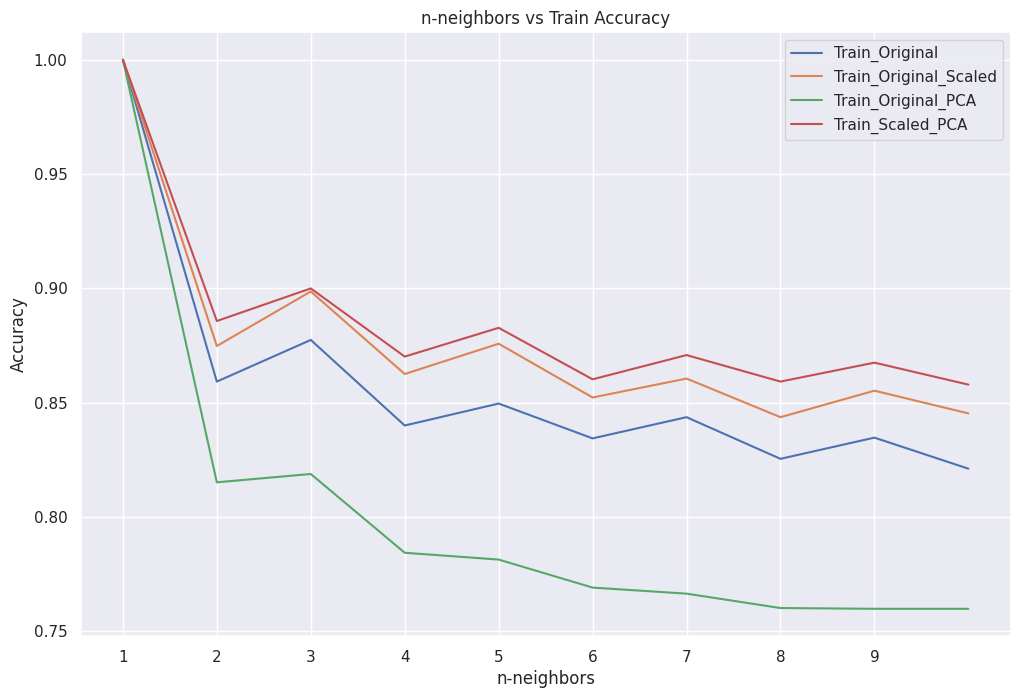

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(x, acc_train, label='Train_Original')
plt.plot(x, acc_train_scaled, label='Train_Original_Scaled')
plt.plot(x, acc_train_pca, label='Train_Original_PCA')
plt.plot(x, acc_train_pca_scaled, label='Train_Scaled_PCA')

plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')
plt.title('n-neighbors vs Train Accuracy')
plt.legend()
plt.xticks(range(1, limit))
plt.show()

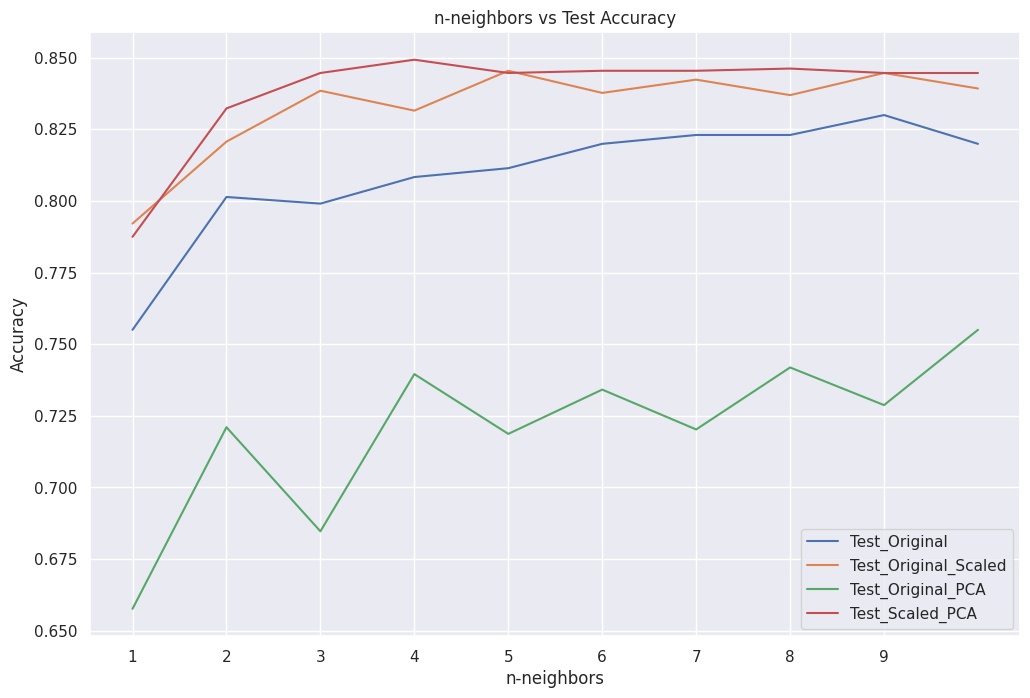

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(x, acc_test, label='Test_Original')
plt.plot(x, acc_test_scaled, label='Test_Original_Scaled')
plt.plot(x, acc_test_pca, label='Test_Original_PCA')
plt.plot(x, acc_test_pca_scaled, label='Test_Scaled_PCA')

plt.xlabel('n-neighbors')
plt.ylabel('Accuracy')
plt.title('n-neighbors vs Test Accuracy')
plt.legend()
plt.xticks(range(1, limit))
plt.show()

In [ ]:
print('La mayor precisión para datos de validación con la base de datos original fue:', max(acc_test),'con:',x[acc_test.index(max(acc_test))], 'vecinos.')
print('La mayor precisión para datos de validación con la base de datos original escalda fue:', max(acc_test_scaled),'con:',x[acc_test_scaled.index(max(acc_test_scaled))], 'vecinos.')
print('La mayor precisión para datos de validación con la base de datos original con PCA fue:', max(acc_test_pca),'con:',x[acc_test_pca.index(max(acc_test_pca))], 'vecinos.')
print('La mayor precisión para datos de validación con la base de datos escalada con PCA fue:', max(acc_test_pca_scaled),'con:',x[acc_test_pca_scaled.index(max(acc_test_pca_scaled))], 'vecinos.')

La mayor precisión para datos de validación con la base de datos original fue: 0.8299845440494591 con: 9 vecinos.
La mayor precisión para datos de validación con la base de datos original escalda fue: 0.8454404945904173 con: 5 vecinos.
La mayor precisión para datos de validación con la base de datos original con PCA fue: 0.7550231839258115 con: 10 vecinos.
La mayor precisión para datos de validación con la base de datos escalada con PCA fue: 0.8493044822256569 con: 4 vecinos.


cross-validation con K-Folds

In [ ]:
def crossval_knn(n, xtrain, ytrain):

  knn = KNeighborsClassifier(n)
  knn.fit(xtrain, ytrain)

  kf = KFold(n_splits=5)

  scores = cross_val_score(knn, xtrain, ytrain, cv=kf, scoring="accuracy")

  print("Metricas cross_validation", scores)
  print("Media de cross_validation", scores.mean())

Métricas

In [ ]:
def metrics(pred, ytest):

  print('Accuracy:', accuracy_score(ytest, predictions))
  print('F1 score:', f1_score(ytest, predictions,average='weighted'))
  print('Recall:', recall_score(ytest, predictions,average='weighted'))
  print('Precision:', precision_score(ytest, predictions, average='weighted'))
  print('\n clasification report:\n', classification_report(ytest, predictions))
  print('\n confusion matrix:\n',confusion_matrix(ytest, predictions))


  #Creating confussion matrix
  snn_cm = confusion_matrix(ytest, predictions)

  # Plotting cofusion matrix
  snn_df_cm = pd.DataFrame(snn_cm, range(2), range(2))
  plt.figure(figsize = (10,7))
  sn.set(font_scale=1.4)
  sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}, fmt="d")
  plt.ylabel('True class')
  plt.xlabel('Predicted class')
  plt.show()


Database original

In [ ]:
n_neighbors = 9

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print('La precisión del clasificador K-NN en el conjunto de datos de entrenamiento es: {:.2f}'.format(knn.score(X_train, y_train)))
print('La precisión del clasificador K-NN en el conjunto de datos de  validación es: {:.2f}'.format(knn.score(X_test, y_test)))

La precisión del clasificador K-NN en el conjunto de datos de entrenamiento es: 0.83
La precisión del clasificador K-NN en el conjunto de datos de  validación es: 0.83


In [ ]:
crossval_knn(n_neighbors, X_train, y_train)

Metricas cross_validation [0.81953642 0.78145695 0.81291391 0.79966887 0.7960199 ]
Media de cross_validation 0.801919211887582


Accuracy: 0.8299845440494591
F1 score: 0.8062287884889294
Recall: 0.8299845440494591
Precision: 0.8272406590135618

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       982
           1       0.81      0.38      0.52       312

    accuracy                           0.83      1294
   macro avg       0.82      0.68      0.71      1294
weighted avg       0.83      0.83      0.81      1294


 confusion matrix:
 [[954  28]
 [192 120]]


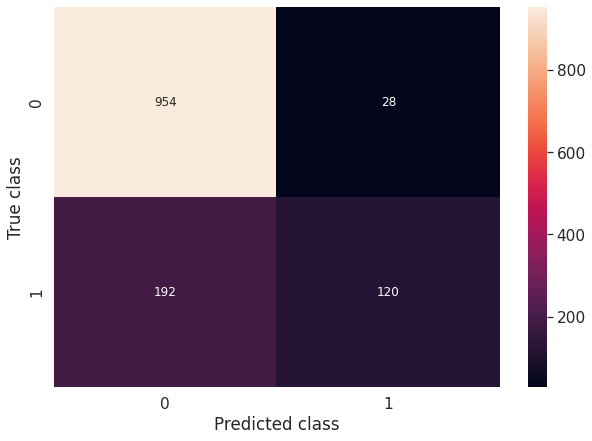

In [ ]:
metrics(predictions, y_test)

Database original escalada

In [ ]:
n_neighbors = 5

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_scaled, y_train_scaled)
predictions = knn.predict(X_test_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(knn.score(X_train_scaled, y_train_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(knn.score(X_test_scaled, y_test_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.88
La precisión del clasificador  en el conjunto de datos de  validación es: 0.85


In [ ]:
crossval_knn(n_neighbors, X_train_scaled, y_train_scaled)

Metricas cross_validation [0.85430464 0.81788079 0.82450331 0.83112583 0.83416252]
Media de cross_validation 0.8323954180532217


Accuracy: 0.8454404945904173
F1 score: 0.8321037692485562
Recall: 0.8454404945904173
Precision: 0.8391306218858351

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.90       982
           1       0.79      0.49      0.61       312

    accuracy                           0.85      1294
   macro avg       0.82      0.73      0.76      1294
weighted avg       0.84      0.85      0.83      1294


 confusion matrix:
 [[940  42]
 [158 154]]


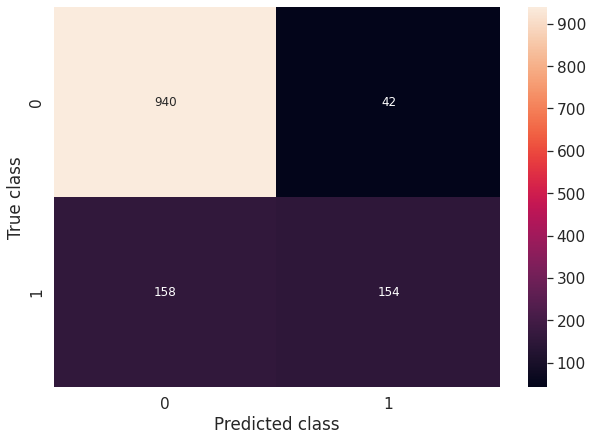

In [ ]:
metrics(predictions, y_test_scaled)

Database PCA

In [ ]:
n_neighbors = 10

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_pca, y_train_pca)
predictions = knn.predict(X_test_pca)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(knn.score(X_train_pca, y_train_pca)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(knn.score(X_test_pca, y_test_pca)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.76
La precisión del clasificador  en el conjunto de datos de  validación es: 0.76


In [ ]:
crossval_knn(n_neighbors, X_train_pca, y_train_pca)

Metricas cross_validation [0.76324503 0.69701987 0.74337748 0.71688742 0.73797678]
Media de cross_validation 0.731701316815481


Accuracy: 0.7550231839258115
F1 score: 0.6874729024990031
Recall: 0.7550231839258115
Precision: 0.6954117093697761

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.97      0.86       982
           1       0.46      0.09      0.15       312

    accuracy                           0.76      1294
   macro avg       0.62      0.53      0.51      1294
weighted avg       0.70      0.76      0.69      1294


 confusion matrix:
 [[948  34]
 [283  29]]


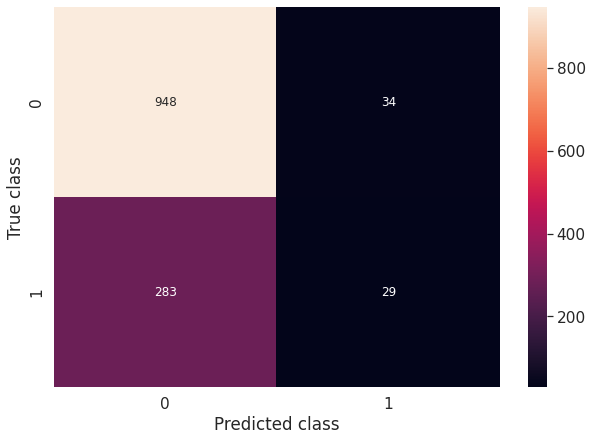

In [ ]:
metrics(predictions, y_test_pca)

Database escalada PCA

In [ ]:
n_neighbors = 3

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train_pca_scaled, y_train_pca_scaled)
predictions = knn.predict(X_test_pca_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(knn.score(X_train_pca_scaled, y_train_pca_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(knn.score(X_test_pca_scaled, y_test_pca_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.90
La precisión del clasificador  en el conjunto de datos de  validación es: 0.84


In [ ]:
crossval_knn(n_neighbors, X_train_pca_scaled, y_train_pca_scaled)

Metricas cross_validation [0.8410596  0.80960265 0.81788079 0.8294702  0.82587065]
Media de cross_validation 0.8247767783598563


Accuracy: 0.8446676970633694
F1 score: 0.8392761439013626
Recall: 0.8446676970633694
Precision: 0.8378409936575155

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       982
           1       0.72      0.59      0.65       312

    accuracy                           0.84      1294
   macro avg       0.80      0.76      0.77      1294
weighted avg       0.84      0.84      0.84      1294


 confusion matrix:
 [[909  73]
 [128 184]]


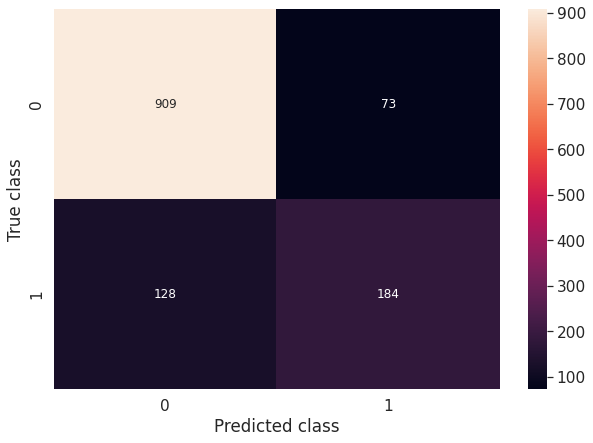

In [ ]:
metrics(predictions, y_test_pca_scaled)

# **Gaussian NB**

cross-validation con K-Folds

In [ ]:
def crossval_gnb(xtrain, ytrain):

  gnb = GaussianNB()
  gnb.fit(xtrain, ytrain) #entrenamiento del modelo

  kf = KFold(n_splits=5)

  scores = cross_val_score(gnb, xtrain, ytrain, cv=kf, scoring="accuracy")

  print("Metricas cross_validation", scores)
  print("Media de cross_validation", scores.mean())

Database Original

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train) #entrenamiento del modelo
predictions = gnb.predict(X_test)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(gnb.score(X_train, y_train)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(gnb.score(X_test, y_test)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.81
La precisión del clasificador  en el conjunto de datos de  validación es: 0.81


In [ ]:
crossval_gnb(X_train, y_train)

Metricas cross_validation [0.81456954 0.81456954 0.81291391 0.8013245  0.7960199 ]
Media de cross_validation 0.8078794767882442


Accuracy: 0.8137557959814529
F1 score: 0.8056263689317539
Recall: 0.8137557959814529
Precision: 0.8029707863861705

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       982
           1       0.64      0.51      0.57       312

    accuracy                           0.81      1294
   macro avg       0.75      0.71      0.72      1294
weighted avg       0.80      0.81      0.81      1294


 confusion matrix:
 [[895  87]
 [154 158]]


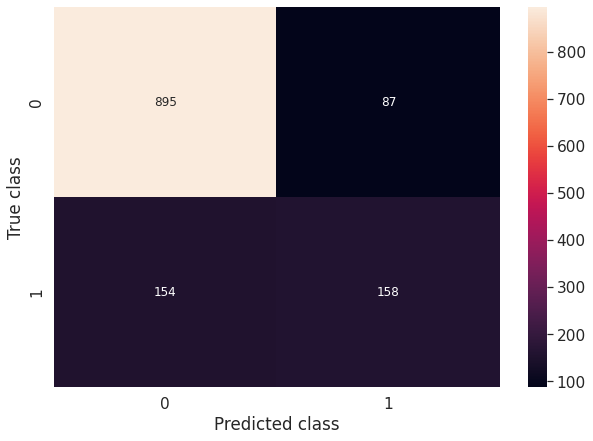

In [ ]:
metrics(predictions, y_test)

Database Original Escalada

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train_scaled) #entrenamiento del modelo
predictions = gnb.predict(X_test_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(gnb.score(X_train_scaled, y_train_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(gnb.score(X_test_scaled, y_test_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.81
La precisión del clasificador  en el conjunto de datos de  validación es: 0.81


In [ ]:
crossval_gnb(X_train_scaled, y_train_scaled)

Metricas cross_validation [0.81456954 0.81456954 0.81291391 0.8013245  0.7960199 ]
Media de cross_validation 0.8078794767882442


Accuracy: 0.8137557959814529
F1 score: 0.8056263689317539
Recall: 0.8137557959814529
Precision: 0.8029707863861705

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       982
           1       0.64      0.51      0.57       312

    accuracy                           0.81      1294
   macro avg       0.75      0.71      0.72      1294
weighted avg       0.80      0.81      0.81      1294


 confusion matrix:
 [[895  87]
 [154 158]]


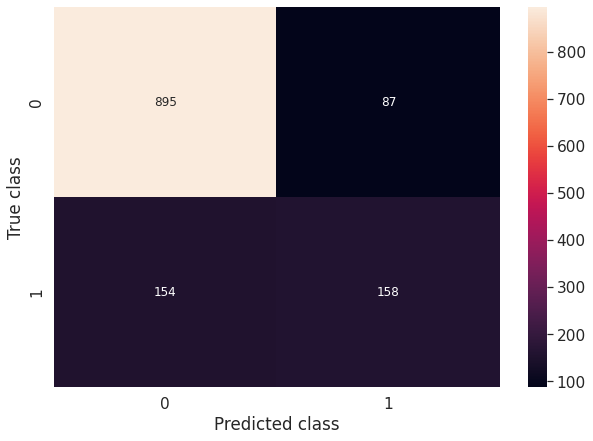

In [ ]:
metrics(predictions, y_test_scaled)

Database Original PCA

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train_pca, y_train_pca) #entrenamiento del modelo
predictions = gnb.predict(X_test_pca)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(gnb.score(X_train_pca, y_train_pca)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(gnb.score(X_test_pca, y_test_pca)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.73
La precisión del clasificador  en el conjunto de datos de  validación es: 0.74


In [ ]:
crossval_gnb(X_train_pca, y_train_pca)

Metricas cross_validation [0.73344371 0.7102649  0.7384106  0.73013245 0.74129353]
Media de cross_validation 0.7307090375934895


Accuracy: 0.7426584234930448
F1 score: 0.6777150891332125
Recall: 0.7426584234930448
Precision: 0.6682613386957916

 clasification report:
               precision    recall  f1-score   support

           0       0.77      0.95      0.85       982
           1       0.36      0.09      0.14       312

    accuracy                           0.74      1294
   macro avg       0.56      0.52      0.49      1294
weighted avg       0.67      0.74      0.68      1294


 confusion matrix:
 [[934  48]
 [285  27]]


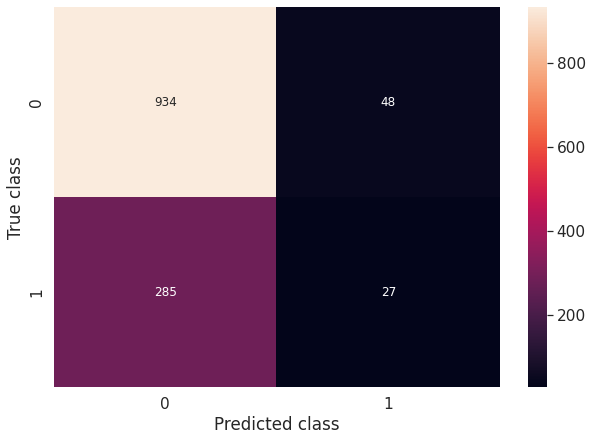

In [ ]:
metrics(predictions, y_test_pca)

Database escalada PCA

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train_pca_scaled, y_train_pca_scaled) #entrenamiento del modelo
predictions = gnb.predict(X_test_pca_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(gnb.score(X_train_pca_scaled, y_train_pca_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(gnb.score(X_test_pca_scaled, y_test_pca_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.78
La precisión del clasificador  en el conjunto de datos de  validación es: 0.79


In [ ]:
crossval_gnb(X_train_pca_scaled, y_train_pca_scaled)

Metricas cross_validation [0.76986755 0.77317881 0.80629139 0.78642384 0.7628524 ]
Media de cross_validation 0.7797227988094846


Accuracy: 0.7936630602782071
F1 score: 0.7823596680218244
Recall: 0.7936630602782071
Precision: 0.778708123784393

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       982
           1       0.60      0.44      0.51       312

    accuracy                           0.79      1294
   macro avg       0.72      0.67      0.69      1294
weighted avg       0.78      0.79      0.78      1294


 confusion matrix:
 [[889  93]
 [174 138]]


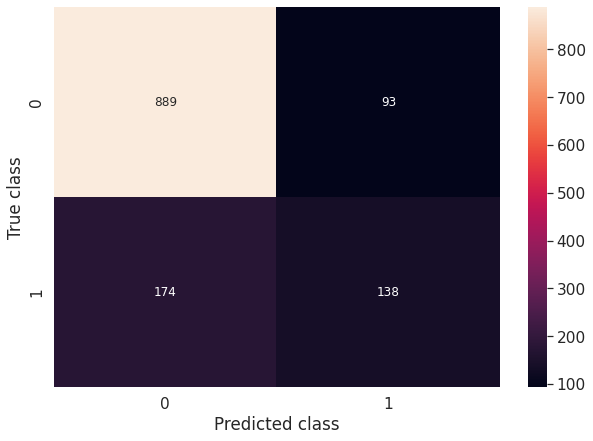

In [ ]:
metrics(predictions, y_test_pca_scaled)

# **LDA**

In [ ]:
limit = 1
step = 0.08

x = [x for x in range(1, int(limit/step) + 1)]
h = [0 for x in range(1, int(limit/step) + 1)]
acc_train = [0 for x in range(0, int(limit/step))]
acc_test = [0 for x in range(0, int(limit/step))]
acc_train_scaled = [0 for x in range(0, int(limit/step))]
acc_test_scaled = [0 for x in range(0, int(limit/step))]
acc_train_pca = [0 for x in range(0, int(limit/step))]
acc_test_pca = [0 for x in range(0, int(limit/step))]
acc_train_pca_scaled = [0 for x in range(0, int(limit/step))]
acc_test_pca_scaled = [0 for x in range(0, int(limit/step))]

hp = 0.00001

for i in range(0, int(limit/step)):


  lda = LDA(tol = hp)

  lda.fit(X_train, y_train)
  acc_train[i] = lda.score(X_train, y_train)
  acc_test[i] = lda.score(X_test, y_test)

  lda.fit(X_train_scaled, y_train_scaled)
  acc_train_scaled[i] = lda.score(X_train_scaled, y_train_scaled)
  acc_test_scaled[i] = lda.score(X_test_scaled, y_test_scaled)

  lda.fit(X_train_pca, y_train_pca)
  acc_train_pca[i] = lda.score(X_train_pca, y_train_pca)
  acc_test_pca[i] = lda.score(X_test_pca, y_test_pca)

  lda.fit(X_train_pca_scaled, y_train_pca_scaled)
  acc_train_pca_scaled[i] = lda.score(X_train_pca_scaled, y_train_pca_scaled)
  acc_test_pca_scaled[i] = lda.score(X_test_pca_scaled, y_test_pca_scaled)

  print('tol value:', hp, 'completed...')
  h[i] = hp + i*0.0125
  hp = h[i]

tol value: 1e-05 completed...
tol value: 1e-05 completed...
tol value: 0.01251 completed...
tol value: 0.03751 completed...
tol value: 0.07501000000000001 completed...
tol value: 0.12501 completed...
tol value: 0.18751 completed...
tol value: 0.26251 completed...
tol value: 0.35001000000000004 completed...
tol value: 0.45001 completed...
tol value: 0.5625100000000001 completed...
tol value: 0.6875100000000001 completed...


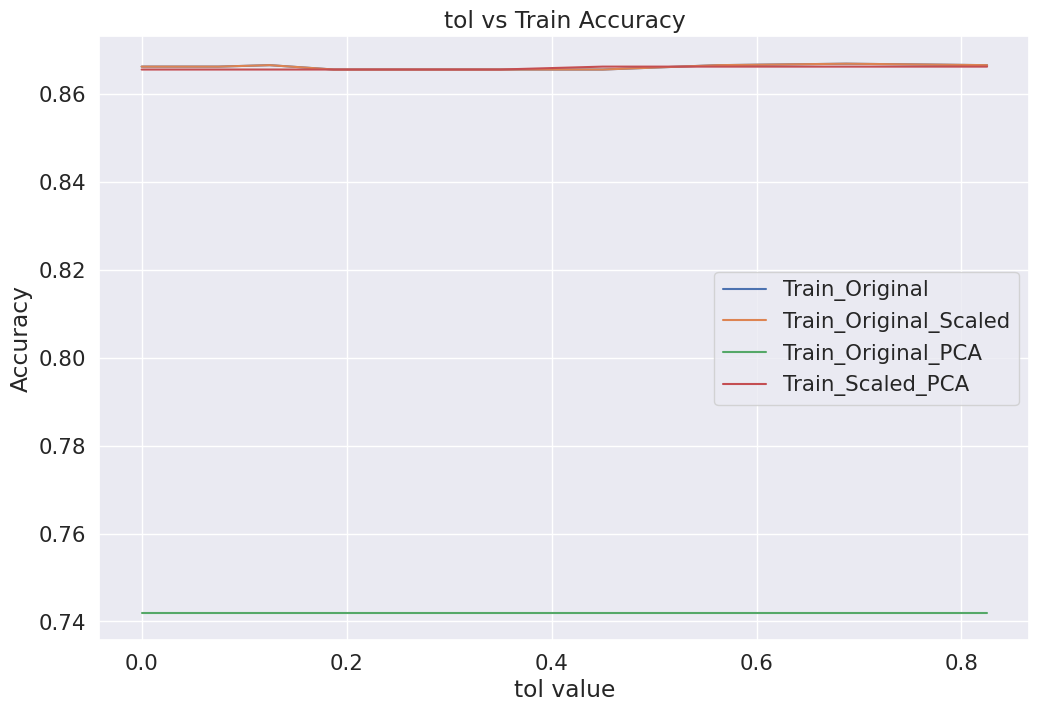

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(h, acc_train, label='Train_Original')
plt.plot(h, acc_train_scaled, label='Train_Original_Scaled')
plt.plot(h, acc_train_pca, label='Train_Original_PCA')
plt.plot(h, acc_train_pca_scaled, label='Train_Scaled_PCA')

plt.xlabel('tol value')
plt.ylabel('Accuracy')
plt.title('tol vs Train Accuracy')
plt.legend()
plt.show()

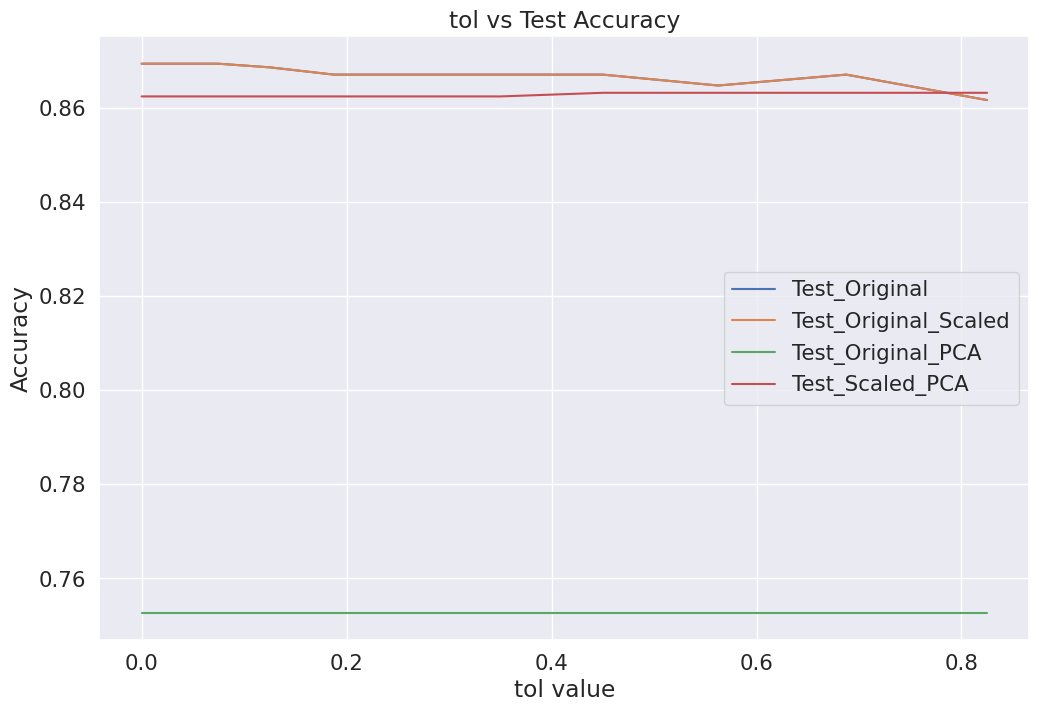

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(h, acc_test, label='Test_Original')
plt.plot(h, acc_test_scaled, label='Test_Original_Scaled')
plt.plot(h, acc_test_pca, label='Test_Original_PCA')
plt.plot(h, acc_test_pca_scaled, label='Test_Scaled_PCA')

plt.xlabel('tol value')
plt.ylabel('Accuracy')
plt.title('tol vs Test Accuracy')
plt.legend()
plt.show()

In [ ]:
print('La mayor precisión para datos de validación con la base de datos original fue:', max(acc_test),'con:', h[acc_test.index(max(acc_test))], 'como valor de tol.')
print('La mayor precisión para datos de validación con la base de datos original escalada fue:', max(acc_test_scaled),'con:', h[acc_test_scaled.index(max(acc_test_scaled))], 'como valor de tol.')
print('La mayor precisión para datos de validación con la base de datos original con PCA fue:', max(acc_test_pca),'con:', h[acc_test_pca.index(max(acc_test_pca))], 'como valor de tol.')
print('La mayor precisión para datos de validación con la base de datos escalada con PCA fue:', max(acc_test_pca_scaled),'con:',h[acc_test_pca_scaled.index(max(acc_test_pca_scaled))], 'como valor de tol.')

La mayor precisión para datos de validación con la base de datos original fue: 0.8693972179289027 con: 1e-05 como valor de tol.
La mayor precisión para datos de validación con la base de datos original escalada fue: 0.8693972179289027 con: 1e-05 como valor de tol.
La mayor precisión para datos de validación con la base de datos original con PCA fue: 0.7527047913446677 con: 1e-05 como valor de tol.
La mayor precisión para datos de validación con la base de datos escalada con PCA fue: 0.8632148377125193 con: 0.45001 como valor de tol.


In [ ]:
def crossval_lda(hpp, xtrain, ytrain):

  lda = LDA(tol = hpp)
  lda.fit(xtrain, ytrain) #entrenamiento del modelo

  kf = KFold(n_splits=5)

  scores = cross_val_score(lda, xtrain, ytrain, cv=kf, scoring="accuracy")

  print("Metricas cross_validation", scores)
  print("Media de cross_validation", scores.mean())

Database original

In [ ]:
hpp = 0.00001
lda = LDA(tol = hpp)

lda.fit(X_train, y_train)
predictions = lda.predict(X_test)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lda.score(X_train, y_train)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lda.score(X_test, y_test)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.87
La precisión del clasificador  en el conjunto de datos de  validación es: 0.87


In [ ]:
crossval_lda(hpp, X_train, y_train)

Metricas cross_validation [0.88410596 0.84437086 0.85927152 0.86258278 0.85406302]
Media de cross_validation 0.8608788288139875


Accuracy: 0.8693972179289027
F1 score: 0.866140178965287
Recall: 0.8693972179289027
Precision: 0.8651665798432201

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       982
           1       0.76      0.66      0.71       312

    accuracy                           0.87      1294
   macro avg       0.83      0.80      0.81      1294
weighted avg       0.87      0.87      0.87      1294


 confusion matrix:
 [[918  64]
 [105 207]]


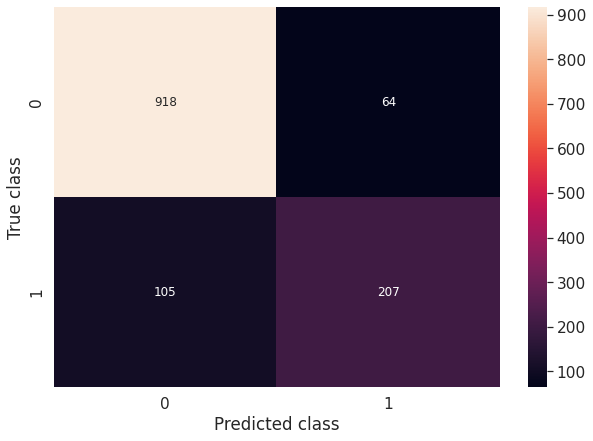

In [ ]:
metrics(predictions, y_test)

Database escalada

In [ ]:
hpp = 0.00001
lda = LDA(tol = hpp)

lda.fit(X_train_scaled, y_train_scaled)
predictions = lda.predict(X_test_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lda.score(X_train_scaled, y_train_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lda.score(X_test_scaled, y_test_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.87
La precisión del clasificador  en el conjunto de datos de  validación es: 0.87


In [ ]:
crossval_lda(hpp, X_train_scaled, y_train_scaled)

Metricas cross_validation [0.88410596 0.84437086 0.85927152 0.86258278 0.85406302]
Media de cross_validation 0.8608788288139875


Accuracy: 0.8693972179289027
F1 score: 0.866140178965287
Recall: 0.8693972179289027
Precision: 0.8651665798432201

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       982
           1       0.76      0.66      0.71       312

    accuracy                           0.87      1294
   macro avg       0.83      0.80      0.81      1294
weighted avg       0.87      0.87      0.87      1294


 confusion matrix:
 [[918  64]
 [105 207]]


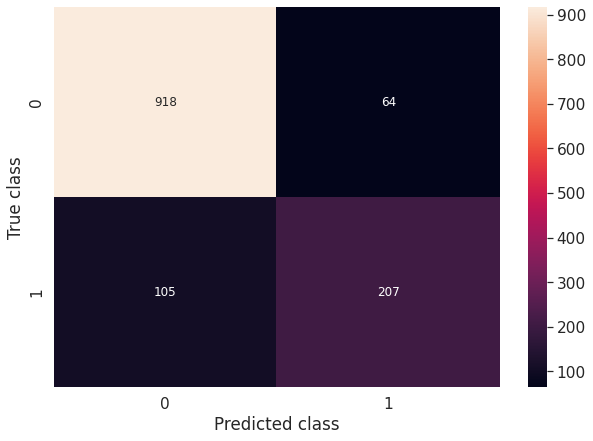

In [ ]:
metrics(predictions, y_test_scaled)

Database original PCA

In [ ]:
hpp = 0.00001
lda = LDA(tol = hpp)

lda.fit(X_train_pca, y_train_pca)
predictions = lda.predict(X_test_pca)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lda.score(X_train_pca, y_train_pca)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lda.score(X_test_pca, y_test_pca)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.74
La precisión del clasificador  en el conjunto de datos de  validación es: 0.75


In [ ]:
crossval_lda(hpp, X_train_pca, y_train_pca)

Metricas cross_validation [0.75496689 0.71357616 0.75496689 0.73178808 0.74958541]
Media de cross_validation 0.7409766839093714


Accuracy: 0.7527047913446677
F1 score: 0.6650436354776995
Recall: 0.7527047913446677
Precision: 0.6639689388065049

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.98      0.86       982
           1       0.36      0.03      0.06       312

    accuracy                           0.75      1294
   macro avg       0.56      0.51      0.46      1294
weighted avg       0.66      0.75      0.67      1294


 confusion matrix:
 [[964  18]
 [302  10]]


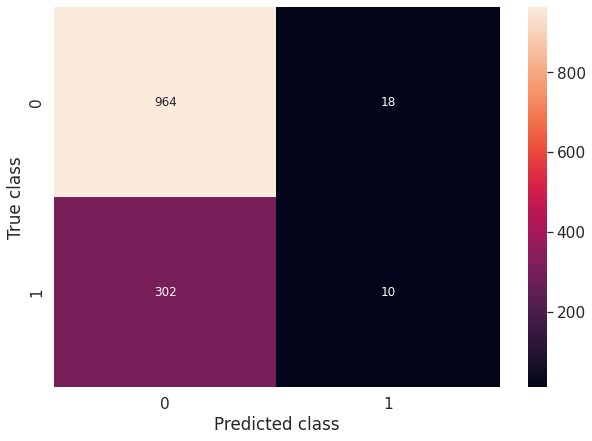

In [ ]:
metrics(predictions, y_test_pca)

Database escalada PCA

In [ ]:
hpp = 0.45001
lda = LDA(tol = hpp)

lda.fit(X_train_pca_scaled, y_train_pca_scaled)
predictions = lda.predict(X_test_pca_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lda.score(X_train_pca_scaled, y_train_pca_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lda.score(X_test_pca_scaled, y_test_pca_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.87
La precisión del clasificador  en el conjunto de datos de  validación es: 0.86


In [ ]:
crossval_lda(hpp, X_train_pca_scaled, y_train_pca_scaled)

Metricas cross_validation [0.88245033 0.84933775 0.85927152 0.86589404 0.86235489]
Media de cross_validation 0.8638617069179488


Accuracy: 0.8632148377125193
F1 score: 0.8592422991667863
Recall: 0.8632148377125193
Precision: 0.8582591533011676

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       982
           1       0.75      0.64      0.69       312

    accuracy                           0.86      1294
   macro avg       0.82      0.79      0.80      1294
weighted avg       0.86      0.86      0.86      1294


 confusion matrix:
 [[917  65]
 [112 200]]


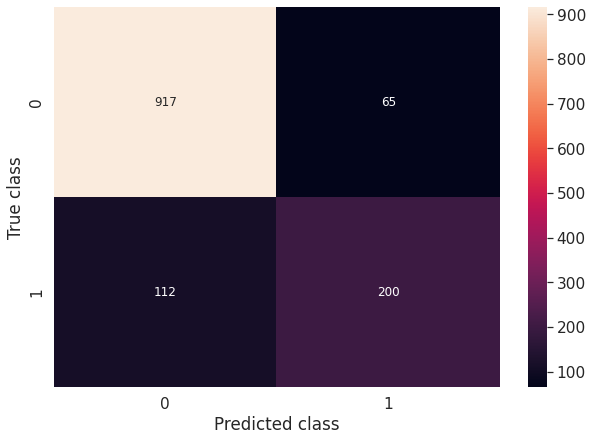

In [ ]:
metrics(predictions, y_test_pca_scaled)

# **Regresión Logística**

In [ ]:
limit = 1
step = 0.1

x = [x for x in range(1, int(limit/step) + 1)]
h = [0 for x in range(1, int(limit/step) + 1)]
acc_train = [0 for x in range(0, int(limit/step))]
acc_test = [0 for x in range(0, int(limit/step))]
acc_train_scaled = [0 for x in range(0, int(limit/step))]
acc_test_scaled = [0 for x in range(0, int(limit/step))]
acc_train_pca = [0 for x in range(0, int(limit/step))]
acc_test_pca = [0 for x in range(0, int(limit/step))]
acc_train_pca_scaled = [0 for x in range(0, int(limit/step))]
acc_test_pca_scaled = [0 for x in range(0, int(limit/step))]

hp = 0.1

for i in range(0, int(limit/step)):

  lr = LogisticRegression(C=hp)

  lr.fit(X_train, y_train)
  acc_train[i] = lr.score(X_train, y_train)
  acc_test[i] = lr.score(X_test, y_test)

  lr.fit(X_train_scaled, y_train_scaled)
  acc_train_scaled[i] = lr.score(X_train_scaled, y_train_scaled)
  acc_test_scaled[i] = lr.score(X_test_scaled, y_test_scaled)

  lr.fit(X_train_pca, y_train_pca)
  acc_train_pca[i] = lr.score(X_train_pca, y_train_pca)
  acc_test_pca[i] = lr.score(X_test_pca, y_test_pca)

  lr.fit(X_train_pca_scaled, y_train_pca_scaled)
  acc_train_pca_scaled[i] = lr.score(X_train_pca_scaled, y_train_pca_scaled)
  acc_test_pca_scaled[i] = lr.score(X_test_pca_scaled, y_test_pca_scaled)

  print('tol value:', hp, 'completed...')
  h[i] = hp + step
  hp = h[i]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tol value: 0.1 completed...
tol value: 0.2 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tol value: 0.30000000000000004 completed...
tol value: 0.4 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


tol value: 0.5 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tol value: 0.6 completed...
tol value: 0.7 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


tol value: 0.7999999999999999 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


tol value: 0.8999999999999999 completed...
tol value: 0.9999999999999999 completed...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


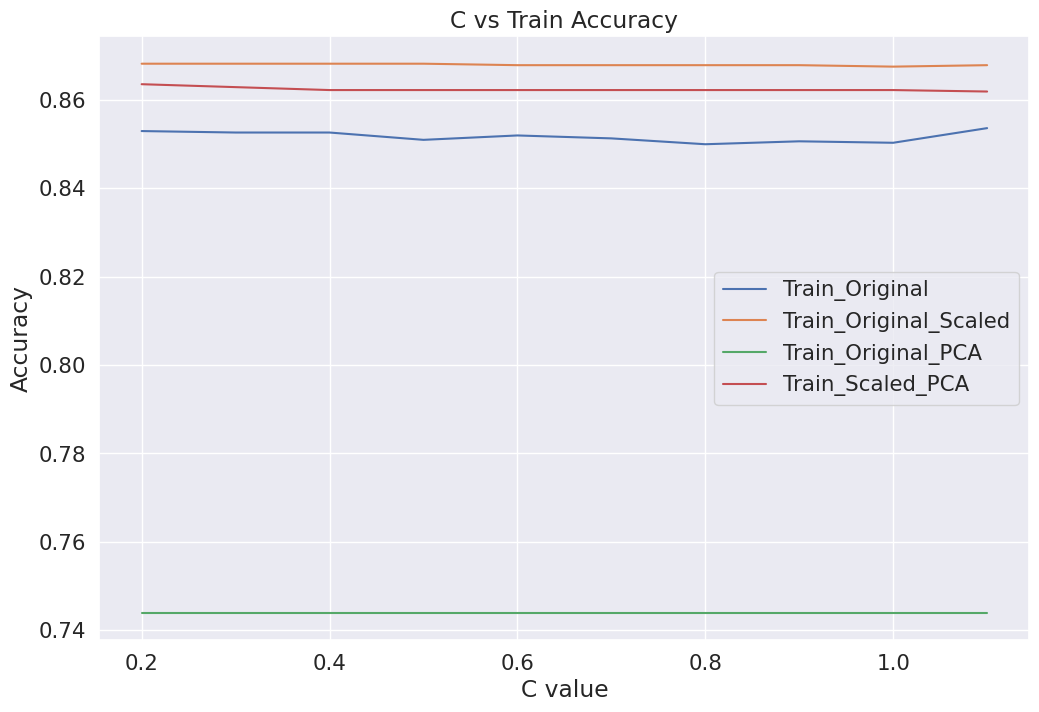

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(h, acc_train, label='Train_Original')
plt.plot(h, acc_train_scaled, label='Train_Original_Scaled')
plt.plot(h, acc_train_pca, label='Train_Original_PCA')
plt.plot(h, acc_train_pca_scaled, label='Train_Scaled_PCA')

plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('C vs Train Accuracy')
plt.legend()
plt.show()

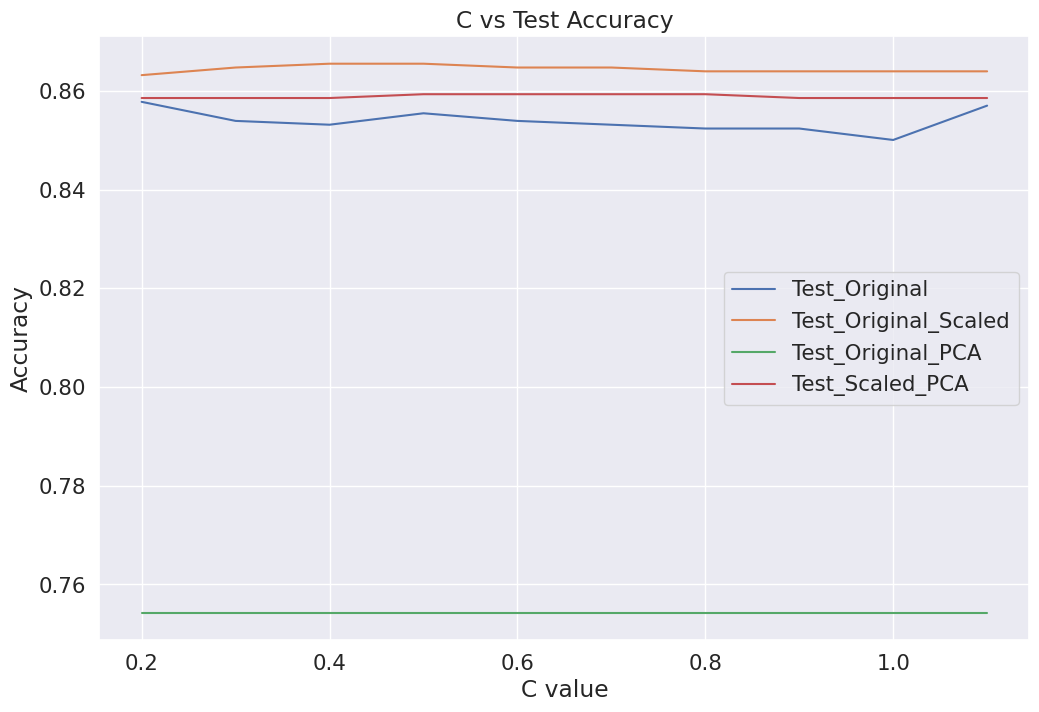

In [ ]:
plt.figure(figsize=(12, 8), dpi=100)
plt.plot(h, acc_test, label='Test_Original')
plt.plot(h, acc_test_scaled, label='Test_Original_Scaled')
plt.plot(h, acc_test_pca, label='Test_Original_PCA')
plt.plot(h, acc_test_pca_scaled, label='Test_Scaled_PCA')

plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('C vs Test Accuracy')
plt.legend()
plt.show()

In [ ]:
print('La mayor precisión para datos de validación con la base de datos original fue:', max(acc_test),'con:', h[acc_test.index(max(acc_test))], 'como valor de C.')
print('La mayor precisión para datos de validación con la base de datos original escalada fue:', max(acc_test_scaled),'con:', h[acc_test_scaled.index(max(acc_test_scaled))], 'como valor de C.')
print('La mayor precisión para datos de validación con la base de datos original con PCA fue:', max(acc_test_pca),'con:', h[acc_test_pca.index(max(acc_test_pca))], 'como valor de C.')
print('La mayor precisión para datos de validación con la base de datos escalada con PCA fue:', max(acc_test_pca_scaled),'con:',h[acc_test_pca_scaled.index(max(acc_test_pca_scaled))], 'como valor de C.')

La mayor precisión para datos de validación con la base de datos original fue: 0.8578052550231839 con: 0.2 como valor de C.
La mayor precisión para datos de validación con la base de datos original escalada fue: 0.865533230293663 con: 0.4 como valor de C.
La mayor precisión para datos de validación con la base de datos original con PCA fue: 0.7542503863987635 con: 0.2 como valor de C.
La mayor precisión para datos de validación con la base de datos escalada con PCA fue: 0.8593508500772797 con: 0.5 como valor de C.


In [ ]:
def crossval_lr(hpp, xtrain, ytrain):

  lr = LogisticRegression(C = hpp)
  lr.fit(xtrain, ytrain) #entrenamiento del modelo

  kf = KFold(n_splits=5)

  scores = cross_val_score(lr, xtrain, ytrain, cv=kf, scoring="accuracy")

  print("Metricas cross_validation", scores)
  print("Media de cross_validation", scores.mean())

Database Original

In [ ]:
hpp = 0.2
lr = LogisticRegression(C = hpp)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print('La precisión del clasificador en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train, y_train)))
print('La precisión del clasificador en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test, y_test)))

La precisión del clasificador en el conjunto de datos de entrenamiento es: 0.85
La precisión del clasificador en el conjunto de datos de  validación es: 0.85


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
crossval_lr(hpp, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Metricas cross_validation [0.86092715 0.83112583 0.85761589 0.83940397 0.83747927]
Media de cross_validation 0.845310423599442


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.8539412673879444
F1 score: 0.8475659075854834
Recall: 0.8539412673879444
Precision: 0.8473676758073404

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       982
           1       0.75      0.59      0.66       312

    accuracy                           0.85      1294
   macro avg       0.81      0.76      0.78      1294
weighted avg       0.85      0.85      0.85      1294


 confusion matrix:
 [[921  61]
 [128 184]]


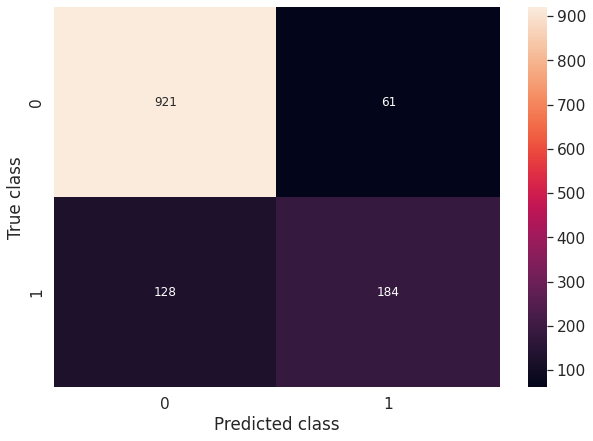

In [ ]:
metrics(predictions, y_test)

Database Escalada

In [ ]:
hpp = 0.4
lr = LogisticRegression(C = hpp)
lr.fit(X_train_scaled, y_train_scaled)
predictions = lr.predict(X_test_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_scaled, y_train_scaled)))
print('La precisión del clasificador en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_scaled, y_test_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.87
La precisión del clasificador en el conjunto de datos de  validación es: 0.87


In [ ]:
crossval_lr(hpp, X_train_scaled, y_train_scaled)

Metricas cross_validation [0.89403974 0.83940397 0.86754967 0.85430464 0.85406302]
Media de cross_validation 0.8618722062974312


Accuracy: 0.865533230293663
F1 score: 0.8628028757020452
Recall: 0.865533230293663
Precision: 0.8616067727059453

 clasification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       982
           1       0.75      0.67      0.71       312

    accuracy                           0.87      1294
   macro avg       0.82      0.80      0.81      1294
weighted avg       0.86      0.87      0.86      1294


 confusion matrix:
 [[912  70]
 [104 208]]


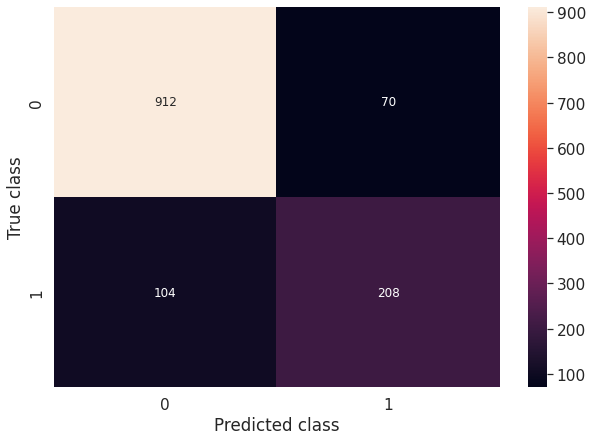

In [ ]:
metrics(predictions, y_test_scaled)

Database Original PCA

In [ ]:
hpp = 0.2
lr = LogisticRegression(C = hpp)
lr.fit(X_train_pca, y_train_pca)
predictions = lr.predict(X_test_pca)

print('La precisión del clasificador en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_pca, y_train_pca)))
print('La precisión del clasificador en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_pca, y_test_pca)))

La precisión del clasificador en el conjunto de datos de entrenamiento es: 0.74
La precisión del clasificador en el conjunto de datos de  validación es: 0.75


In [ ]:
crossval_lr(hpp, X_train_pca, y_train_pca)

Metricas cross_validation [0.75993377 0.71854305 0.75662252 0.73013245 0.75290216]
Media de cross_validation 0.7436267887933402


Accuracy: 0.7542503863987635
F1 score: 0.6633717721632804
Recall: 0.7542503863987635
Precision: 0.6651953025928705

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       982
           1       0.36      0.03      0.05       312

    accuracy                           0.75      1294
   macro avg       0.56      0.51      0.45      1294
weighted avg       0.67      0.75      0.66      1294


 confusion matrix:
 [[968  14]
 [304   8]]


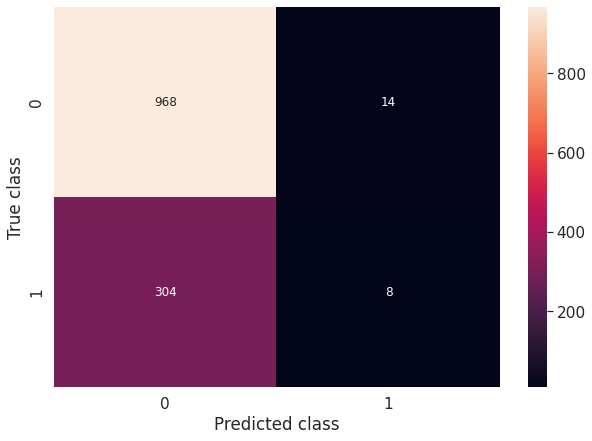

In [ ]:
metrics(predictions, y_test_pca)

Database Escalada PCA

In [ ]:
hpp = 0.5
lr = LogisticRegression(C = hpp)
lr.fit(X_train_pca_scaled, y_train_pca_scaled)
predictions = lr.predict(X_test_pca_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_pca_scaled, y_train_pca_scaled)))
print('La precisión del clasificador en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_pca_scaled, y_test_pca_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.86
La precisión del clasificador en el conjunto de datos de  validación es: 0.86


In [ ]:
crossval_lr(hpp, X_train_pca_scaled, y_train_pca_scaled)

Metricas cross_validation [0.88245033 0.83112583 0.86423841 0.84768212 0.85406302]
Media de cross_validation 0.855911941396769


Accuracy: 0.8593508500772797
F1 score: 0.8551681922888226
Recall: 0.8593508500772797
Precision: 0.8540783656253113

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       982
           1       0.75      0.63      0.68       312

    accuracy                           0.86      1294
   macro avg       0.82      0.78      0.80      1294
weighted avg       0.85      0.86      0.86      1294


 confusion matrix:
 [[915  67]
 [115 197]]


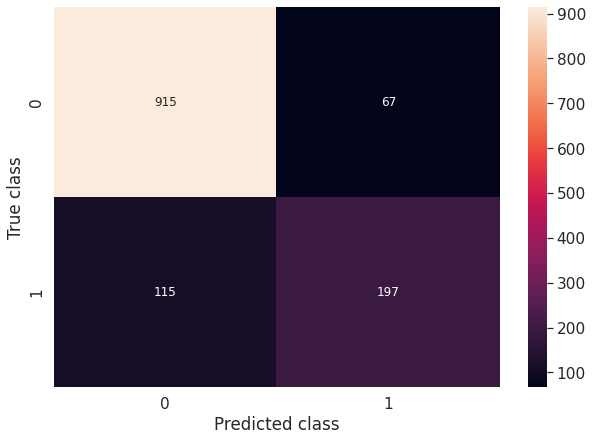

In [ ]:
metrics(predictions, y_test_pca_scaled)

Regresión Logística equilibrando la clase minoritaria

In [ ]:
def crossval_lrp(hpp, xtrain, ytrain):

  lr = LogisticRegression(C = hpp)
  lr.fit(xtrain, ytrain) #entrenamiento del modelo

  kf = KFold(n_splits=5)

  scores = cross_val_score(lr, xtrain, ytrain, cv=kf, scoring="accuracy")

  print("Metricas cross_validation", scores)
  print("Media de cross_validation", scores.mean())

Database Original

In [ ]:
hpp = 0.2
lr = LogisticRegression(C = hpp, class_weight="balanced")
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

print('La precisión del clasificador en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train, y_train)))
print('La precisión del clasificador en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test, y_test)))

La precisión del clasificador en el conjunto de datos de entrenamiento es: 0.80
La precisión del clasificador en el conjunto de datos de  validación es: 0.80


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
crossval_lrp(hpp, X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Metricas cross_validation [0.86092715 0.83112583 0.85761589 0.83940397 0.83747927]
Media de cross_validation 0.845310423599442


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.7967542503863988
F1 score: 0.8072270591922883
Recall: 0.7967542503863988
Precision: 0.8346174345928519

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86       982
           1       0.56      0.79      0.65       312

    accuracy                           0.80      1294
   macro avg       0.74      0.80      0.75      1294
weighted avg       0.83      0.80      0.81      1294


 confusion matrix:
 [[784 198]
 [ 65 247]]


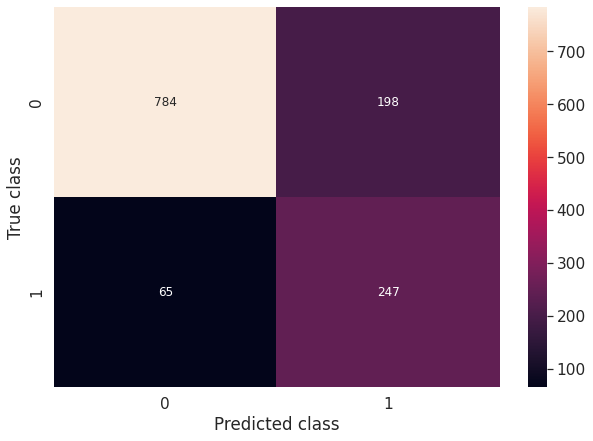

In [ ]:
metrics(predictions, y_test)

Database Original escalada

In [ ]:
hpp = 0.4
lr = LogisticRegression(C = hpp, class_weight="balanced")
lr.fit(X_train_scaled, y_train_scaled)
predictions = lr.predict(X_test_scaled)

print('La precisión del clasificador en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_scaled, y_train_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_scaled, y_test_scaled)))

La precisión del clasificador en el conjunto de datos de entrenamiento es: 0.83
La precisión del clasificador  en el conjunto de datos de  validación es: 0.82


In [ ]:
crossval_lrp(hpp, X_train_scaled, y_train_scaled)

Metricas cross_validation [0.89403974 0.83940397 0.86754967 0.85430464 0.85406302]
Media de cross_validation 0.8618722062974312


Accuracy: 0.8168469860896446
F1 score: 0.8260975881774167
Recall: 0.8168469860896446
Precision: 0.8519042820456375

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87       982
           1       0.59      0.83      0.69       312

    accuracy                           0.82      1294
   macro avg       0.76      0.82      0.78      1294
weighted avg       0.85      0.82      0.83      1294


 confusion matrix:
 [[799 183]
 [ 54 258]]


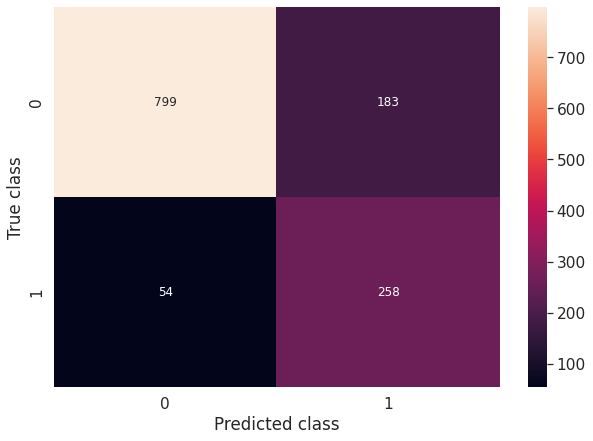

In [ ]:
metrics(predictions, y_test_scaled)

Database Original PCA

In [ ]:
hpp = 0.2
lr = LogisticRegression(C = hpp, class_weight="balanced")
lr.fit(X_train_pca, y_train_pca)
predictions = lr.predict(X_test_pca)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_pca, y_train_pca)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_pca, y_test_pca)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.63
La precisión del clasificador  en el conjunto de datos de  validación es: 0.60


In [ ]:
crossval_lrp(hpp, X_train_pca, y_train_pca)

Metricas cross_validation [0.75993377 0.71854305 0.75662252 0.73013245 0.75290216]
Media de cross_validation 0.7436267887933402


Accuracy: 0.5996908809891809
F1 score: 0.6245804979226716
Recall: 0.5996908809891809
Precision: 0.6705590508154516

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.64      0.71       982
           1       0.29      0.46      0.36       312

    accuracy                           0.60      1294
   macro avg       0.54      0.55      0.53      1294
weighted avg       0.67      0.60      0.62      1294


 confusion matrix:
 [[631 351]
 [167 145]]


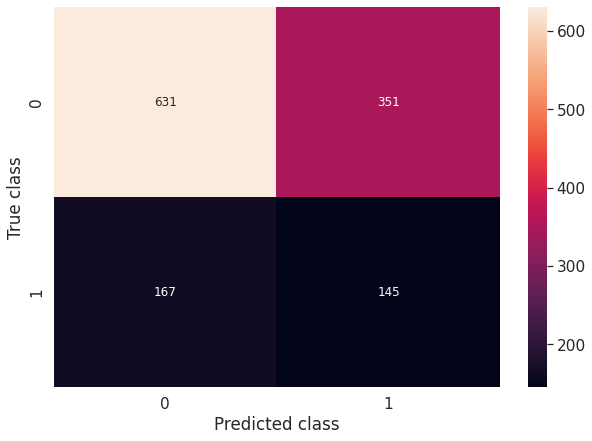

In [ ]:
metrics(predictions, y_test_pca)

Database Escalada PCA

In [ ]:
hpp = 0.5
lr = LogisticRegression(C = hpp, class_weight="balanced")
lr.fit(X_train_pca_scaled, y_train_pca_scaled)
predictions = lr.predict(X_test_pca_scaled)

print('La precisión del clasificador  en el conjunto de datos de entrenamiento es: {:.2f}'.format(lr.score(X_train_pca_scaled, y_train_pca_scaled)))
print('La precisión del clasificador  en el conjunto de datos de  validación es: {:.2f}'.format(lr.score(X_test_pca_scaled, y_test_pca_scaled)))

La precisión del clasificador  en el conjunto de datos de entrenamiento es: 0.82
La precisión del clasificador  en el conjunto de datos de  validación es: 0.81


In [ ]:
crossval_lrp(hpp, X_train_pca_scaled, y_train_pca_scaled)

Metricas cross_validation [0.88245033 0.83112583 0.86423841 0.84768212 0.85406302]
Media de cross_validation 0.855911941396769


Accuracy: 0.8052550231839258
F1 score: 0.8153386219661956
Recall: 0.8052550231839258
Precision: 0.8428620045422369

 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86       982
           1       0.57      0.81      0.67       312

    accuracy                           0.81      1294
   macro avg       0.75      0.81      0.76      1294
weighted avg       0.84      0.81      0.82      1294


 confusion matrix:
 [[789 193]
 [ 59 253]]


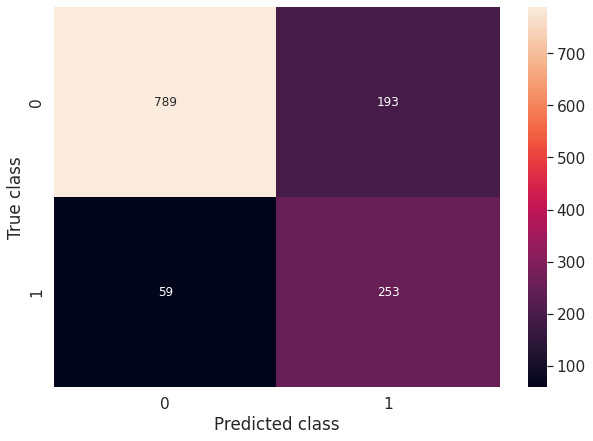

In [ ]:
metrics(predictions, y_test_pca_scaled)